# House Price Prediction

# Steps of the Project:
1-EDA (Exploratory Data Analysis)

2-Modeling 

3-Visualization 

4- Results 

In [2]:
# House Price Prediction using Linear Regression
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1-EDA (Exploratory Data Analysis)

In [3]:
# Loading Dataset
data = pd.read_csv('AB_US_2023.csv')

/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_10039/3991554810.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AB_US_2023.csv')


In [4]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco


In [32]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

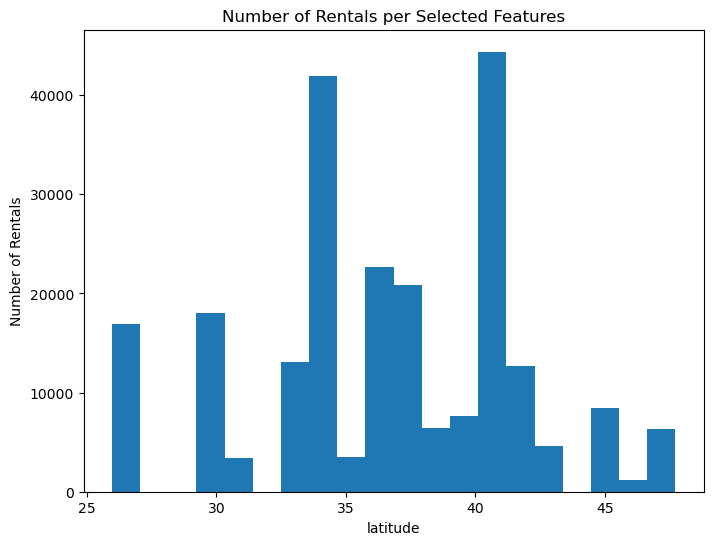

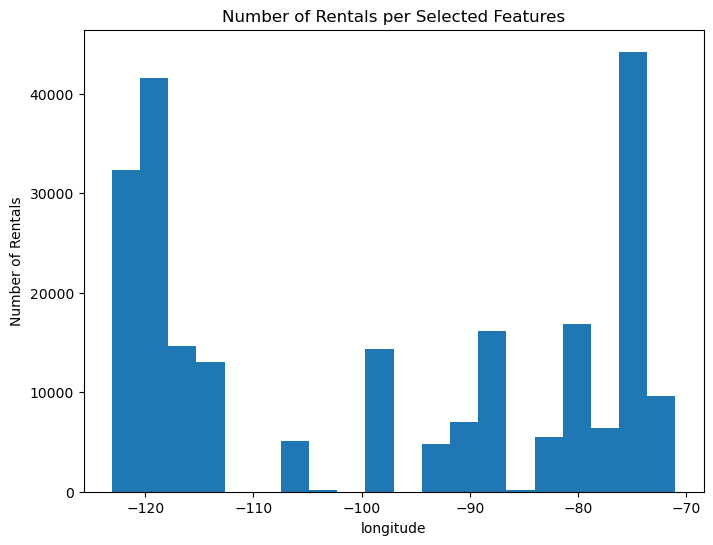

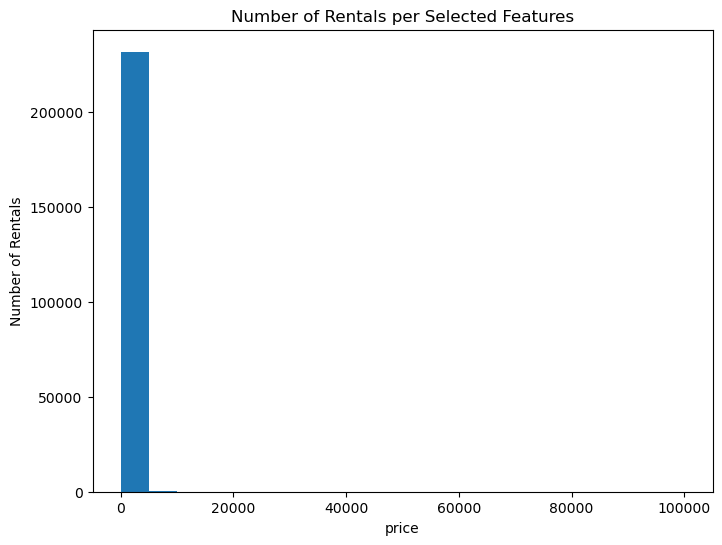

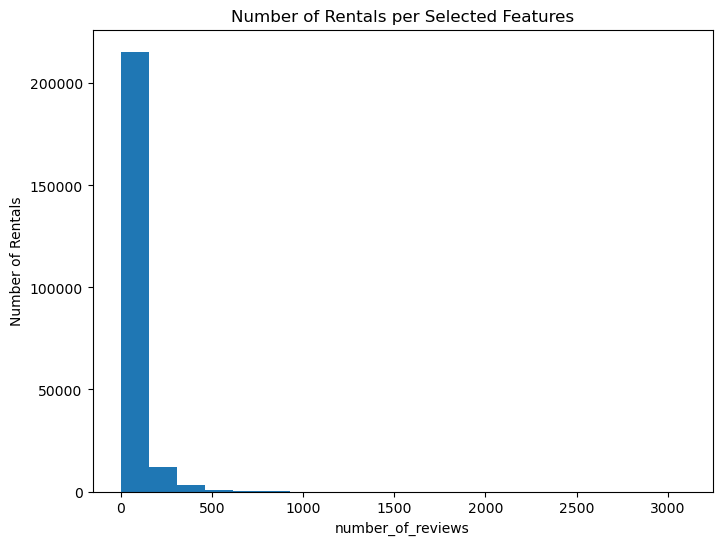

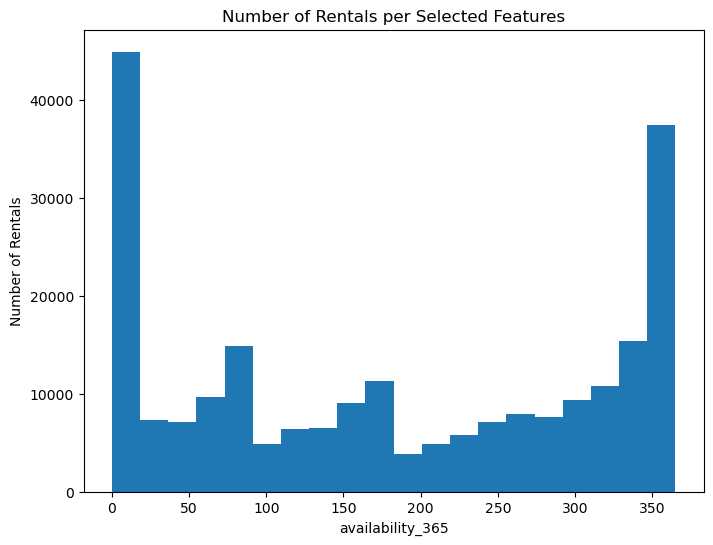

In [33]:
# Anomolies and Outliars detection via matplotlib visualization

numerical_cols = ['latitude','longitude','price','number_of_reviews','availability_365']
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    plt.hist(data[col],bins=20)
    plt.title("Number of Rentals per Selected Features")
    plt.xlabel(col)
    plt.ylabel("Number of Rentals")
    

In [ ]:
# CScattered plor of features count
#data['number_of_reviews'].value_counts().plot(kind='bar')
#plt.title('number of Reviews')
#plt.xlabel('Reviews')
#plt.ylabel('Count')
#sns.despine

for col in numerical_cols:
    plt.figure(figsize=(8,6))
    #plt.bar(data[col],bins=20)
    data[col].value_counts().plot(kind='bar')
    plt.title("Number of Rentals per Selected Features")
    plt.xlabel(col)
    plt.ylabel("Number of Rentals")

In [ ]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

In [ ]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

In [7]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)


Missing values:
id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64


In [8]:
# Convert 'price' column to numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                 id       host_id      latitude     longitude         price  \
count  7.259800e+04  7.259800e+04  72598.000000  72598.000000  72598.000000   
mean   1.823393e+17  1.423973e+08     38.444726    -96.140075    211.929915   
std    3.059776e+17  1.520003e+08      4.148187     22.642695    942.084009   
min    1.090000e+02  5.210000e+02     33.338650   -122.419050      0.000000   
25%    2.019296e+07  1.720953e+07     34.081430   -118.359110     85.000000   
50%    4.180370e+07  7.472514e+07     40.675605    -74.086280    134.000000   
75%    5.630622e+17  2.389895e+08     40.759680    -73.945593    218.000000   
max    8.515213e+17  5.045184e+08     47.734010    -71.124610  99000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    72598.000000       72598.000000       72598.000000   
mean        14.971721          42.690198           1.367562   
std         26.064565          76.709555           1.807458   
min          1.

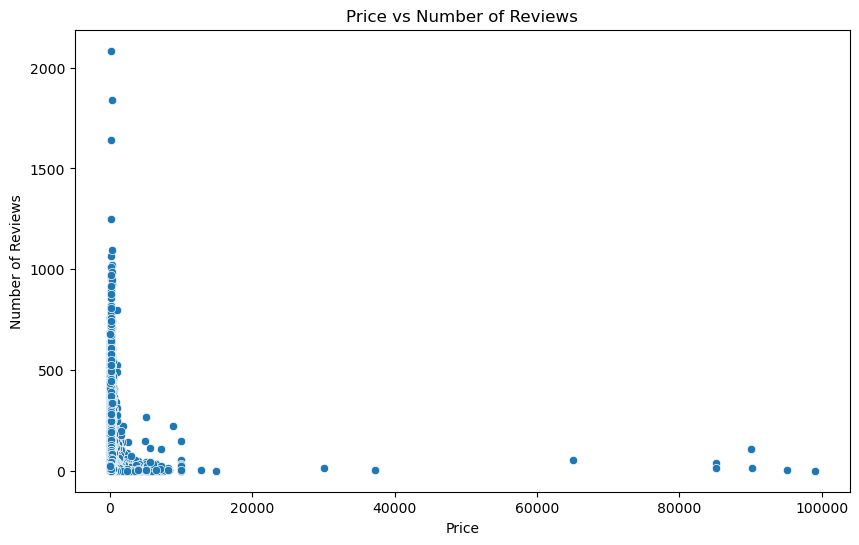

In [11]:
# Scatter plot of 'price' vs 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data)
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

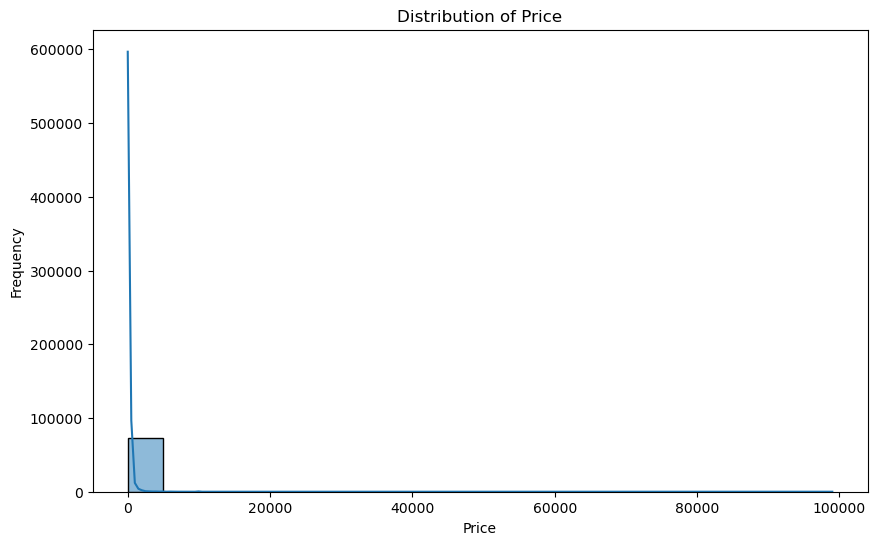

In [10]:
# Histogram of 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Rentals with price over 20000 and reviews over 1500 are very rare and are expected to be redundant in our modeling.

## 2-Modeling 
    -Linear Regression (i) 
    -Boosting (i), 


## Splitting the Data Set

In [16]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=['city'])  # Assuming 'city' is the target variable
y = data['city']
print(X["city"])
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'city'

In [15]:
data.drop?

## Linear Regression

## Boosting

## KNN

In [ ]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n

In [ ]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the training data
knn.fit(X_train, y_train)

#Testing the KNN model
# Predictions on the testing set
knn_predictions = knn.predict(X_test)

# Evaluating the KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
knn_accuracy = accuracy_score(y

In [17]:
_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, knn_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))

NameError: name 'y_train' is not defined

  
  ##  Random Forest
  

 ##    Decision Tree

  ## Train/Test

## 3-Visualization 
-Matplotlib (i,e), -Seaborn (i,e), -Folium (i,e) 

## 4- Results 
Cross Validation

In [ ]:














# Training the random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf.fit(X_train, y_train)


# Testing the Random Forest model
# Predictions on the testing set
rf_predictions = rf.predict(X_test)

# Evaluating the Random Forest model
# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# K-Fold cross-validation with KNN modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("KNN Cross-Validation Scores:", knn_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", knn_cv_scores.mean())

# K-Fold Cross-Validation with Random Forest modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=kfold)

# Print the cross-validation scores
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", rf_cv_scores.mean())

# Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Assuming you have predictions and true labels for regression
# For example, let's say you have predictions from a regression model stored in 'y_pred'
# And the true labels are stored in 'y_true'

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Median Absolute Error (medAE)
medae = median_absolute_error(y_true, y_pred)
print("Median Absolute Error (medAE):", medae)

# Calculate R-squared (R2) score
r2 = r2_score(y_true, y_pred)
print("R-squared (R2) Score:", r2)

# Visualization with Folium
import folium

# Create a map centered around a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # Coordinates for San Francisco

# Add a marker to the map
folium.Marker(location=[37.7749, -122.4194], popup="San Francisco").add_to(m)

# Save the map to an HTML file
m.save("map.html")

